In [1]:
from itertools import product

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pop_tools
import xpersist as xp

import util

In [2]:
retro = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/cesm-le-fields-djf-retro-trends.zarr')


NameError: name 'ds_djf_regional' is not defined

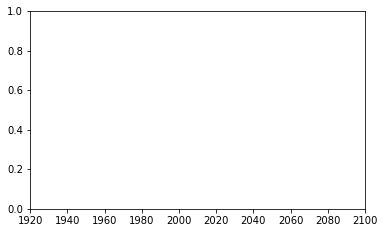

In [3]:
v = 'SST'
region = 'Southern Ocean'

hexcolor = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']

fig = plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(2,1)

ax = fig.add_subplot(gs[0, 0])
ax.set_xlim((1920, 2100))
#ax.set_ylabel('O$_2$ [mmol m$^{-3}$]')

for m_id in ds_djf_regional.member_id:
    var_i = ds_djf_regional[v].sel(member_id=m_id, region=region)
    ax.plot(ds_djf_regional.time, var_i, '-', linewidth=0.5)
    
ax.plot(ds_djf_regional.time, ds_djf_regional[v].sel(region=region).mean('member_id'), '-', 
        linewidth=1, color='k')

ax.set_xticklabels([])
ax.set_ylabel(f'{ds_djf_regional[v].long_name} [{ds_djf_regional[v].units}]')

ax = fig.add_subplot(gs[1, 0])
handles = []
for n_year in ds_djf_rgn_trnd.trend_length.values:
    da = ds_djf_rgn_trnd[v].sel(trend_length=n_year, region=region)
    
    y_mean = da.mean('member_id')
    y_std = da.std('member_id')
    
    y_low = y_mean - y_std
    y_hi = y_mean + y_std
    
    color = hexcolor.pop()
    
    p = ax.plot(
        ds_djf_rgn_trnd.trend_year, y_mean, 
        '-', label=f'{n_year:d} yr trends', color=color
    )
    handles.append(p[0])
    
    ax.plot(
        ds_djf_rgn_trnd.trend_year, y_low,
        '-', label='%d yr trends', color=color,
        linewidth=0.2
    )            
    ax.plot(
        ds_djf_rgn_trnd.trend_year, y_hi, 
        '-', label='%d yr trends', color=color, 
        linewidth=0.2
    )
    
    ax.fill_between(
        ds_djf_rgn_trnd.trend_year, y_low, y_hi,
        facecolor=color, alpha=0.4
    )
    

    s2n = y_mean / y_std
    for l in range(len(ds_djf_rgn_trnd.trend_year)):
        
        # where the signal to noise is greater than 2, detect!
        if all(np.abs(s2n[l:]) > 2):
            toex = ds_djf_rgn_trnd.trend_year.values[l]
            toey = y_mean.values[l]
            ax.plot(toex, toey, '*', 
                    color=color, 
                    markeredgecolor='k',
                    markeredgewidth=0.2,
                    markersize=10)
            break
            
ax.legend(handles, [h.get_label() for h in handles])
ax.axhline(0, color='k', linewidth=0.5, zorder=-10)

ax.set_xlabel('Year')
ax.set_ylabel(f'{ds_djf_rgn_trnd[v].long_name} [{ds_djf_rgn_trnd[v].units}]')

gs.update(hspace=0.05)

ax = fig.get_axes()
alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1 - 0.01
    x = p.x0 - 0.05
    fig.text(x, y, '%s'%alp[i],
             fontsize=14.,
             fontweight='semibold')